In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv(r"C:\Users\sk414\OneDrive\Desktop\ML project\DataSets-master\DataSets-master\Bmi_male_female.csv")

In [3]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
type(data["Index"])

pandas.core.series.Series

In [5]:
data.shape

(500, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
len(data[data["Gender"]=="Male"])

245

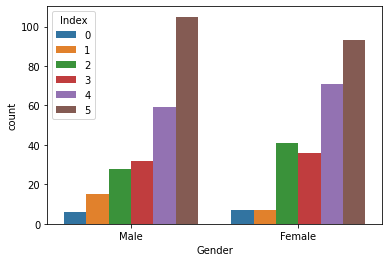

In [9]:
sb.countplot(x="Gender",data=data,hue="Index")
plt.show()

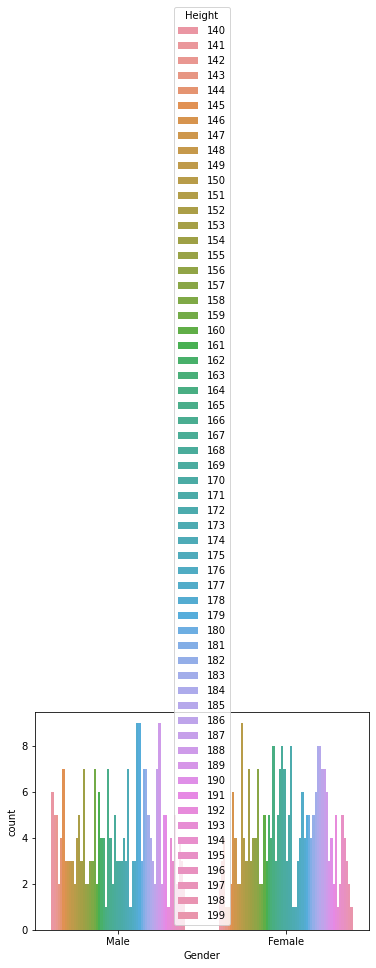

In [10]:
sb.countplot(x="Gender",data=data,hue="Height")
plt.show()

In [11]:
#sb.countplot(x="Gender",data=data,hue="Weight")
#plt.show()

# Data separation (Input output)

In [12]:
x_GHW=data.iloc[:,0:3]
y_index=data.iloc[:,3]

In [13]:
x_GHW

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [14]:
y_index

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [15]:
type(y_index)

pandas.core.series.Series

In [16]:
print(type(x_GHW))

<class 'pandas.core.frame.DataFrame'>


In [17]:
x_GHW.head(1)

,Gender,Height,Weight
0,Male,174,96


# ## Encode{Male:0,Fmale:1}

In [18]:
x_GHW.Gender=x_GHW.Gender.map({"Male":0,"Female":1})

In [19]:
x_GHW

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [20]:
Index_Result=pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

In [21]:
Index_Result

0     Extremely Weak
1               Weak
2             Normal
3         Overweight
4            Obesity
5    Extreme Obesity
dtype: object

In [22]:
#spliting the data into training and testing th data

In [23]:
n=int(len(x_GHW)*.70)

In [24]:
#Converting  df and series into ND array

In [25]:
XA=x_GHW.values
YA=y_index.values

In [26]:
print(type(XA))

<class 'numpy.ndarray'>


In [27]:
print(type(YA))

<class 'numpy.ndarray'>


In [28]:
XA

array([[  0, 174,  96],
       [  0, 189,  87],
       [  1, 185, 110],
       ...,
       [  1, 141, 136],
       [  0, 150,  95],
       [  0, 173, 131]], dtype=int64)

In [29]:
n=int(len(x_GHW)*.70)

In [30]:
xtrain=x_GHW[:n]
xtest=x_GHW[n:]
ytrain=y_index[:n]
ytest=y_index[n:]

In [31]:
print("shape of xtrain {} and Shape of ytrain{}".format(xtrain.shape,ytrain.shape))
print("shape of x test {} and Shape of ytest{}".format(xtest.shape,ytest.shape))

shape of xtrain (350, 3) and Shape of ytrain(350,)
shape of x test (150, 3) and Shape of ytest(150,)


# ## Training the model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_trainer= KNeighborsClassifier(n_neighbors=5)
knn_learner=knn_trainer.fit(xtrain,ytrain)

In [34]:
i=knn_learner.predict([[0,160,58]])
Index_Result[i]

2    Normal
dtype: object

In [35]:
# Testing (ytest>>yp) for xtest

In [36]:
yact=ytest #xtest
yp=knn_learner.predict(xtest)

In [37]:
yactvsyp=pd.DataFrame({"yact":list(yact),"yp":list(yp)})

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
acc=accuracy_score(yp,yact)*100

In [40]:
acc

91.33333333333333

In [41]:
kmax=int(np.sqrt(len(xtrain)))+1
krange=list(range(1,kmax))
krange

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [42]:
acc_list=[]
for i in range(1,kmax):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    model_learner=knn_model.fit(xtrain,ytrain)
    ypmodel=model_learner.predict(xtest)
    model_acc=accuracy_score(yact,ypmodel)
    acc_list.append(model_acc)
    print("Value of k {} and acc is {}".format(i,model_acc))

Value of k 1 and acc is 0.8933333333333333
Value of k 2 and acc is 0.9066666666666666
Value of k 3 and acc is 0.8933333333333333
Value of k 4 and acc is 0.9333333333333333
Value of k 5 and acc is 0.9133333333333333
Value of k 6 and acc is 0.9133333333333333
Value of k 7 and acc is 0.9133333333333333
Value of k 8 and acc is 0.9066666666666666
Value of k 9 and acc is 0.92
Value of k 10 and acc is 0.9066666666666666
Value of k 11 and acc is 0.9
Value of k 12 and acc is 0.92
Value of k 13 and acc is 0.9133333333333333
Value of k 14 and acc is 0.92
Value of k 15 and acc is 0.88
Value of k 16 and acc is 0.8933333333333333
Value of k 17 and acc is 0.8933333333333333
Value of k 18 and acc is 0.9066666666666666


In [43]:
print("acc max",np.array(acc_list).max())
print("k ",np.array(acc_list).argmax()+1)

acc max 0.9333333333333333
k  4


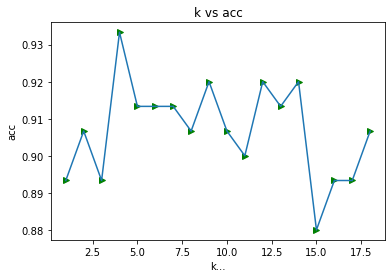

In [44]:
plt.plot(krange,acc_list,'g>')
plt.plot(krange,acc_list)
plt.xlabel("k...")
plt.ylabel("acc")
plt.title("k vs acc")
plt.show()